<a href="https://colab.research.google.com/github/techonair/Machine-Learing-A-Z/blob/main/Clustering/K-Mean%20Clustering/K_Mean_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Mean Clustering

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing Dataset

In [2]:
from google.colab import files
files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


{'Mall_Customers.csv': b'CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)\r\n0001,Male,19,15,39\r\n0002,Male,21,15,81\r\n0003,Female,20,16,6\r\n0004,Female,23,16,77\r\n0005,Female,31,17,40\r\n0006,Female,22,17,76\r\n0007,Female,35,18,6\r\n0008,Female,23,18,94\r\n0009,Male,64,19,3\r\n0010,Female,30,19,72\r\n0011,Male,67,19,14\r\n0012,Female,35,19,99\r\n0013,Female,58,20,15\r\n0014,Female,24,20,77\r\n0015,Male,37,20,13\r\n0016,Male,22,20,79\r\n0017,Female,35,21,35\r\n0018,Male,20,21,66\r\n0019,Male,52,23,29\r\n0020,Female,35,23,98\r\n0021,Male,35,24,35\r\n0022,Male,25,24,73\r\n0023,Female,46,25,5\r\n0024,Male,31,25,73\r\n0025,Female,54,28,14\r\n0026,Male,29,28,82\r\n0027,Female,45,28,32\r\n0028,Male,35,28,61\r\n0029,Female,40,29,31\r\n0030,Female,23,29,87\r\n0031,Male,60,30,4\r\n0032,Female,21,30,73\r\n0033,Male,53,33,4\r\n0034,Male,18,33,92\r\n0035,Female,49,33,14\r\n0036,Female,21,33,81\r\n0037,Female,42,34,17\r\n0038,Female,30,34,73\r\n0039,Female,36,37,26\r\n0040,Female

## Preprocessing the dataset
We know in our dataset there is no dependent variable, therefore we will only create X dataset in which we can either take necessary variables or for simplification for later visualiation we can take just two columns that are the Annual Income and Spending Score.

We will create two cases to study both.

### **Warning: Run only one case at a time**

# **Case 1: 4D Array**

In [6]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[: , 1:].values

## **Encoding Independent Variable**
### This is needed because during the training of our machine learning model it could try to see patterns in country column which is unnecessary and not needed. Therefore dividing country column in three columns as vector will give neat data to work with. 

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# creation of object for producing dummy variables
columnTransform = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [0])], remainder = 'passthrough'  )
# columnTransform.fit_transform( ) will not give array in output which is necessary in training ml model therefore
X = np.array(columnTransform.fit_transform(X))

In [ ]:
print(X)

# **Case 2: 2D Array**

In [21]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[: , [3,4]].values

In [22]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

## Using elbow method for finding the optimal number of clusters

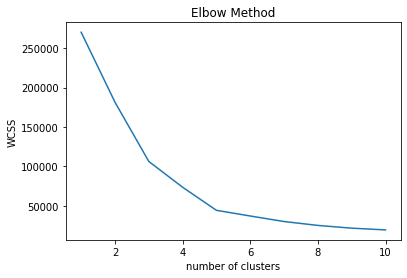

In [23]:
from sklearn.cluster import KMeans
 
wcss = []

for i in range(1,11):
  kmean = KMeans(n_clusters = i, init= 'k-means++', random_state = 42)
  kmean.fit(X)
  wcss.append(kmean.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

Optimal number of clusters as per the elbow method: 5

## Training the K-Mean Model on the dataset 

In [24]:
kmean = KMeans(n_clusters = 5, init= 'k-means++', random_state = 42)
y_kmean = kmean.fit_predict(X)

In [25]:
print(y_kmean)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


## Visualizing the result (for Case 2 only)

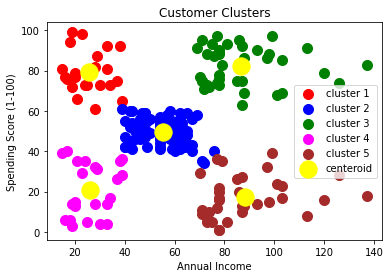

In [29]:
plt.scatter(X[y_kmean == 0, 0], X[y_kmean == 0, 1], s= 100, c = 'red', label='cluster 1')
plt.scatter(X[y_kmean == 1, 0], X[y_kmean == 1, 1], s= 100, c = 'blue', label='cluster 2')
plt.scatter(X[y_kmean == 2, 0], X[y_kmean == 2, 1], s= 100, c = 'green', label='cluster 3')
plt.scatter(X[y_kmean == 3, 0], X[y_kmean == 3, 1], s= 100, c = 'magenta', label='cluster 4')
plt.scatter(X[y_kmean == 4, 0], X[y_kmean == 4, 1], s= 100, c = 'brown', label='cluster 5')
plt.scatter(kmean.cluster_centers_[: , 0], kmean.cluster_centers_[:, 1], s = 300, c= 'yellow', label='centeroid')
plt.title('Customer Clusters')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
